## Means Testing

#### A Note on the Central Limit Theorem

If you have a population (regardless of distribution) with mean μ and take sufficiently large random samples (usually N > 30 [for each independent sample]) from the population, then the distribution of the sample means will be approximately normally distributed

In [2]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

In [2]:
# simulate rolling a virtual die


### Distribution of sample means 
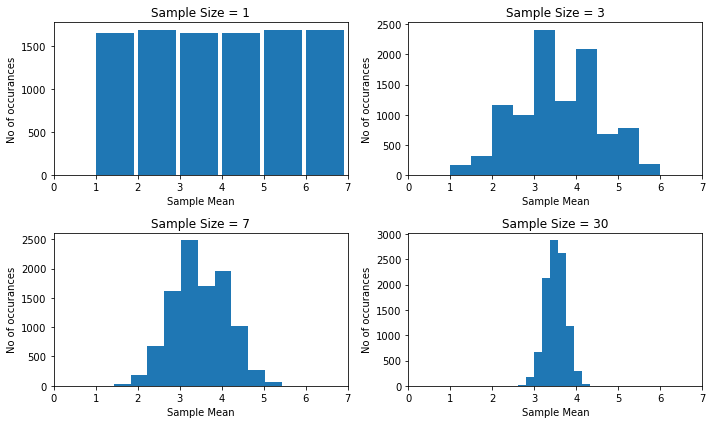

# Comparing Means


_______________________________________________________________________

|Goal|$H_{0}$|Data Needed|Parametric Test|Assumptions*||  
|---|---|---|---|---|---|  
|Compare observed mean to theoretical one|$\mu_{obs} = \mu_{th}$|array-like of observed values & float of theoretical|One sample t-test: scipy.stats.ttest_1samp|Normally Distributed\*\*||   
|Compare two observed means (independent samples)|$\mu_{a} = \mu_{b}$|2 array-like samples|Independent t-test (or 2-sample): scipy.stats.ttest_ind|Independent, Normally Distributed\*\*, Equal Variances\*\*\*||   
|Compare several observed means (independent samples)|$\mu_{a} = \mu_{b} = \mu_{n}$|n array-like samples|ANOVA: scipy.stats.f_oneway|Independent, Normally Distributed\*\*, Equal Variances**||   

\*If assumptions can't be met, the equivalent non-parametric test can be used.  
\*\*Normal Distribution assumption can be be met by having a large enough sample (due to Central Limit Theorem), or the data can be scaled using a Gaussian Scalar.   
\*\*\*The argument in the stats.ttest_ind() method of `equal_var` can be set to `False` to accomodate this assumption.   

## One Sample T-Test

Goal: Compare observed mean to theoretical one. 

1. Plot Distributions (i.e. Histograms!)  

2. Establish Hypotheses   

||||  
|-----|-----|---------|  
|Null Hypothesis|$H_{0}$|$\mu_{obs} = \mu_{th}$|  
|Alternative Hypothesis (2-tail, significantly different)|$H_{a}$|$\mu_{obs} != \mu_{th}$|  
|Alternative Hypothesis (1-tail, significantly smaller)|$H_{a}$|$\mu_{obs} < \mu_{th}$|  
|Alternative Hypothesis (1-tail, significantly larger)|$H_{a}$|$\mu_{obs} > \mu_{th}$|      

3. Set Significance Level: $\alpha = .05$

4. Verify Assumptions: Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  

5. Compute test statistic and probability (t-statistic & p-value) using `scipy.stats.ttest_1samp`. 

6. Decide. **For a 2-tailed test, we take the p-value as is. For a 1-tailed test, we evaluate $p/2 < \alpha$ and $t > 0$ (to test if higher), and of a less-than test when $p/2 < \alpha$ and $t < 0$.**

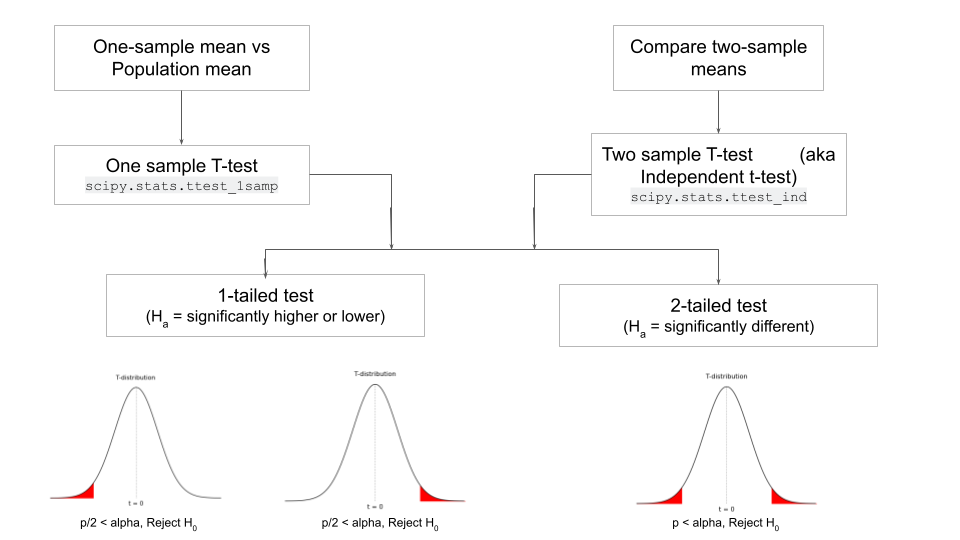

- t-statistic == 0 means no difference is means (i.e null hypothesis is true)
- Only when t-statistic is larger enough (positive or negative) we are confident that means are different enough to reject null

# lets pull in mpg, a data set that we are somewhat  familiar with.

In [4]:
mpg = data('mpg')

In [5]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
#lets form some opinions
#automatic transmission vehicles may have differnt highway mileage than manual
#older cars have lower cty fuel efficiency than newer cars
# the displacement of older cars is difference from all cars 

In [6]:
#the displacement of older cars is different from all cars
mpg.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

it appears in this case taht 1999 care our best definition of old
we will continue forward with this distinction


### H$_0$ 
- The mean displacement of vehicles from 1999 is no different from all vehicles

### H$_a$ 
- the mean displacement of vehicles from 1999 is different than the mean displacement from the mean of all vehicles in our data

### Determining our test:
    - we are comparing 1999 vehicles to *all* vehicles
        - this means we want to perform a 1-sample test
    - we are comparing the means of 1999 vehicles to all vehicles by way of sheer difference, 
    we have a two tail test

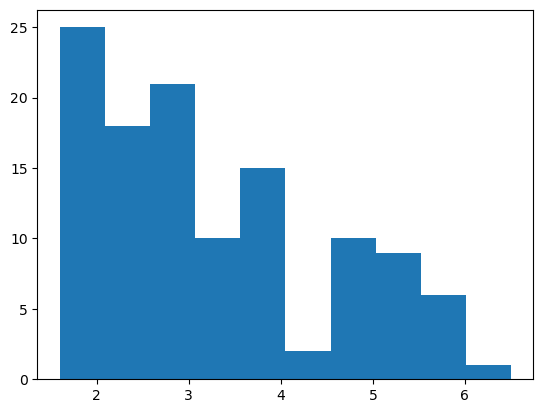

In [11]:
plt.hist(mpg[mpg.year == 1999].displ)
plt.show()

In [18]:
displ_old = mpg[mpg.year == 1999].displ

In [12]:
# this does look significantly tailed,
# due to the central limit theorem (CLT) and idea that this is likely skewed for a multitue
#of reasons I'm still currently going to stick with a t-test
#we will get picker about this later

In [14]:
μth = mpg.displ.mean()
μth

3.4717948717948697

In [15]:
#confidence level is = 0.95
α = 0.05

In [16]:
#actually doing the t-test:
#arguments
#first: the sample of mpg where the mpg year is 1999
#then specifically getting displacement col
#Second: alpha
stats.ttest_1samp(mpg[mpg.year == 1999].displ, μth)

Ttest_1sampResult(statistic=-1.6361431738775498, pvalue=0.10452008593170266)

In [ ]:
#questions for a two tailed one sample test:
#because it's two tailed , p< α

In [68]:
t_stat, p_val = stats.ttest_1samp(displ_old,μth)

In [21]:
p_val

0.10452008593170266

In [22]:
p_val < α

False

In [ ]:
#older cars have lower cty fuel efficiency than newer cars
#first steps 
#set up hypothesis
#set a cl and alpha
#determine if this is one sample or two sample
#determine if this is one tailed or two tailed


H$_0$ : 1999 vehicles have an average city milage that is greater than or the same (>=) as 2008 vehicles

H$_a$: my 1999 vehicles have a mean city milage that is lower than the mean city mileage of 2008 vehicles

In [ ]:
#sample: 2008 cars vs 1999 cars
#two sample: independent t-test
#tailedness: 1999 vehicles have a city metric that is lower that 2008 vehicles
#one tailed: we have a sense of direction 
#when we make this assessment, p/2 < α
#and t stat needs to be negative

In [ ]:
#check out spread of information

In [23]:
#make variables for our two samples
cty_1999= mpg[mpg.year == 1999].cty
cty_2008= mpg[mpg.year != 1999].cty

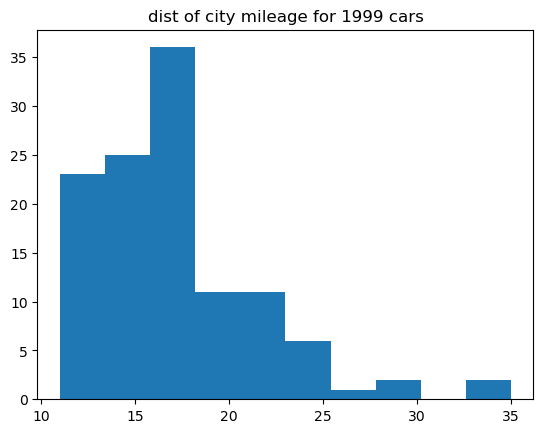

In [26]:
plt.hist(cty_1999)
plt.title('dist of city mileage for 1999 cars')
plt.show()

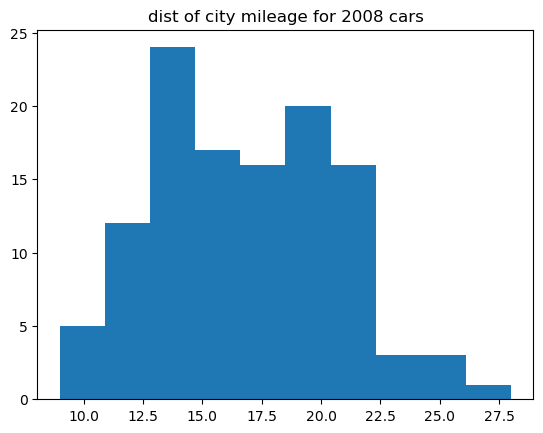

In [27]:
plt.hist(cty_2008)
plt.title('dist of city mileage for 2008 cars')
plt.show()

In [ ]:
#based on what whe have here clt is still doing some lifting for us,
#however, we see that 2008 cars seem to have a more normal dist off the cuff
#which could tell us something a bout the way tha tsampling was taken on 19999 vehicles
#or that 1999 vehicles have some outliers that may or may not need addressing in our data prep stage

In [ ]:
#lets check the other parameter of variance here:
#how do we do that?

H$_0$:1999 cars have equal variance in city mileage from 2008 cars

H$_a$:1999 cars have different varience in city mileage to 2008 cars

- sub-alpha:0.05
- we'll run a levene test to check the varience between the two
- if p<alpha, we will reject the null and say these groups have inequal variance

In [28]:
stats.levene(cty_1999,cty_2008)

LeveneResult(statistic=0.030273333475361427, pvalue=0.8620232104333374)

In [ ]:
#p value is real high! .86 is bigger than .05 by a alot
#i cannot reject the null hypothesis here!


- based on the results of my levene test, i am presuming equal variance for these two samples

In [29]:
#be mindful when you feed arguments to ttest_ind
#when you have one-tailed test!
t_stat,p_val = stats.ttest_ind(cty_1999,cty_2008,equal_var=True)

In [30]:
t_stat

0.5674988409997608

In [31]:
p_val

0.5709240495406107

In [32]:
(p_val / 2) < α

False

once again, i cannot reject my null hypothosis because p/2 is not less than alpha and because my t stat is not less than 0

automatic trans vehicles may have different hwy mileage than manual transmission

In [ ]:
#my groups for testing
# automatic trans veh
#manual trans veh

#one sample or two sample?
#two sample because automatic and manual vehicles
#are both explicit subcategories of vehicles
#they have highway mileage that is differnt
#one tailed or two tailed:
#two tailed, because we are not imbuing directionality to our difference


In [ ]:
#two sample, two tails

In [ ]:
#ttest_ind

In [ ]:
#parameter check:

In [ ]:
#normal(ish)?
#variance equal? (levene)
#independent?

In [ ]:
#there are no cars that are both manual and automatic so we can say that they are exlusive/ independent

In [35]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [36]:
# using a str method for starting with auto to 
#make a bool col that states if a vehicle is auto or not
mpg['auto_transmission'] = mpg.trans.str.startswith('auto')

In [37]:
#my two groups of comparison:
#hwy mileage of auto
#hwy mileage of manual(!auto)

In [38]:

.00

In [44]:
mpg[mpg.auto_transmission !=True].trans.value_counts()

manual(m5)    58
manual(m6)    19
Name: trans, dtype: int64

H$_0$: there is no difference in mean hwy mileage between automatic and manual

H$_a$: there is a difference in mean hwy mileage between auto and manual

In [48]:
#do a levene test to get variance!
#argument order does not matter as much in levene test
#because we are just checking for a difference in variance not a deirectional difference in variance
#h0:variance is equal in auto and manual hwy mileage
#ha:variance is inequal in auto and manual highway mileage
#CL:.95, alpha:0.05
α = 0.05
__, levene_p = stats.levene(auto_hwy,manual_hwy)

In [49]:
levene_p < α

False

In [ ]:
#we cannot reject the null hypothesis, we will presume equivalent varaince here
#equal_var = True

In [52]:
#we have over 30 samples we can rely on clt
auto_hwy.size, manual_hwy.size

(157, 77)

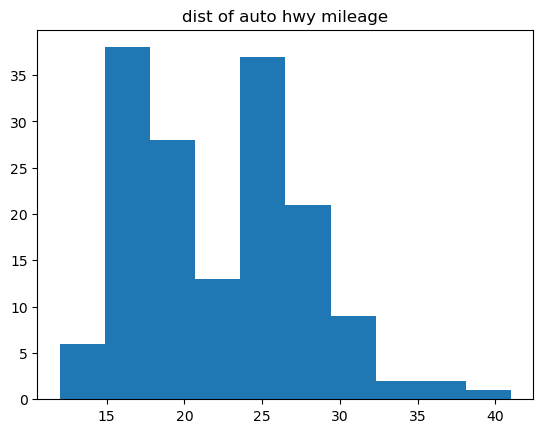

In [50]:
#normality check
plt.hist(auto_hwy)
plt.title('dist of auto hwy mileage')
plt.show()

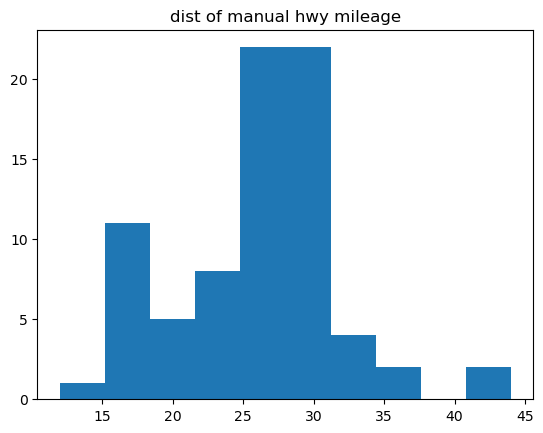

In [51]:
plt.hist(manual_hwy)
plt.title('dist of manual hwy mileage')
plt.show()

In [ ]:
#lets do the actual test!


In [58]:
t_stat, p_val = stats.ttest_ind(manual_hwy,auto_hwy,equal_var=True)

In [59]:
t_stat

4.368349972819688

In [60]:
p_val

1.888044765552951e-05

In [61]:
p_val < α

True

our p value is less than alpha! this means that we can reject the null hypothesis and suggest that there is some measureable difference in the average highway mileage of automatic vehicles to manual vehicles

In [63]:
#lets reconstruct this:
#H0: man veh hwy mileage is less than or equal to auto veh hwy mileage
#Ha: man veh hwy mileage on average is greater than auto average milage
#two samples
#man cars, auto cars
#one tail:
#manual vehicles have higher average highway mileage
t_stat, p_val = stats.ttest_ind(manual_hwy,auto_hwy,equal_var=True)

In [65]:
#for a two sample, one tailed test,
#with this specific order of comparison
#i need both of these to be true
#in order to reject the null hypothesis
(p_val/2) < α and (t_stat > 0)

True

In [66]:
#they are both true with meanse I can reject the null hypothesis
#which is a stronger statement than i had the first time
#because im suggestin a direction difference
#in means(hwy mileage of man is greater)

T stat is the difference between the means

A p-value is a statistical measurement used to validate a hypothesis against observed data. A p-value measures the probability of obtaining the observed results, assuming that the null hypothesis is true.